# Load Modules

In [1]:
import pandas as pd
import pandas as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ApparelCPI

### Load Data

In [2]:
df_01=pd.read_csv('./data/ApparelCPI.csv')
df_01['Date']=pd.to_datetime(df_01['Date'], format='%m/%d/%Y')
df_01=df_01.set_index(['Date'])
df_01.head()


,ApparelCPI
Date,
2016-01-01,121.878
2016-02-01,125.567
2016-03-01,127.427
2016-04-01,127.770
2016-05-01,127.758


## MODEL USING X13 SEATS

### Order 

In [3]:
res = sm.tsa.x13_arima_select_order(df_01,x12path='./x13as/')
print(res.order, res.sorder)

(1, 0, 0) (0, 1, 0)


### ARIMA analysis

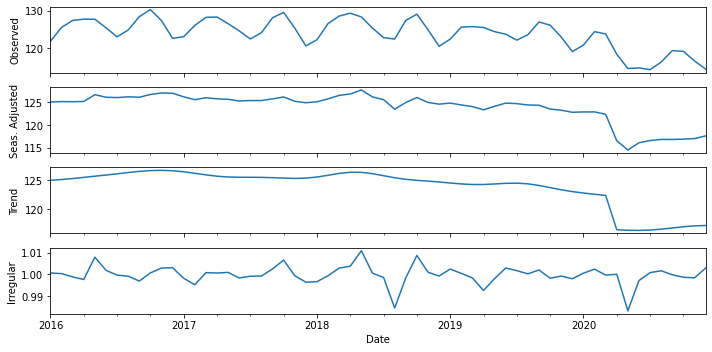

In [4]:
analysis = sm.tsa.x13_arima_analysis(df_01,x12path='./x13as/')
fig = analysis.plot()
fig.set_size_inches(10, 5)
plt.tight_layout()

### Seasonal Adjusted to csv file

In [5]:
analysis.seasadj.to_csv('apparelCPISA2020.csv')
analysis.seasadj.head()

Date
2016-01-01    125.074195
2016-02-01    125.163652
2016-03-01    125.141553
2016-04-01    125.195018
2016-05-01    126.694432
Name: seasadj, dtype: float64

### Seasonal Factor

In [6]:
seasonalFactor=pd.Series(analysis.observed['ApparelCPI']).div(analysis.seasadj)
seasonalFactor.head()

Date
2016-01-01    0.974446
2016-02-01    1.003223
2016-03-01    1.018263
2016-04-01    1.020568
2016-05-01    1.008395
dtype: float64

<AxesSubplot:xlabel='Date'>

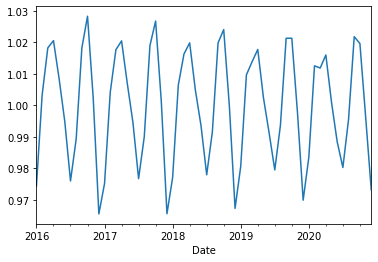

In [7]:
seasonalFactor.plot()


# ApparelCPI 2021

In [8]:
df_02=pd.read_csv('./data/ApparelCPI2021.csv')
df_02['Date']=pd.to_datetime(df_02['Date'], format='%m/%d/%Y')
df_02=df_02.set_index(['Date'])
df_02.head()

,ApparelCPI
Date,
2017-01-01,123.088
2017-02-01,126.100
2017-03-01,128.250
2017-04-01,128.349
2017-05-01,126.563


## MODEL USING X13 SEATS

### Order 

In [9]:
res = sm.tsa.x13_arima_select_order(df_02,x12path='./x13as/')
print(res.order, res.sorder)

(1, 0, 1) (1, 0, 0)


C:\Users\nando\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


### ARIMA analysis

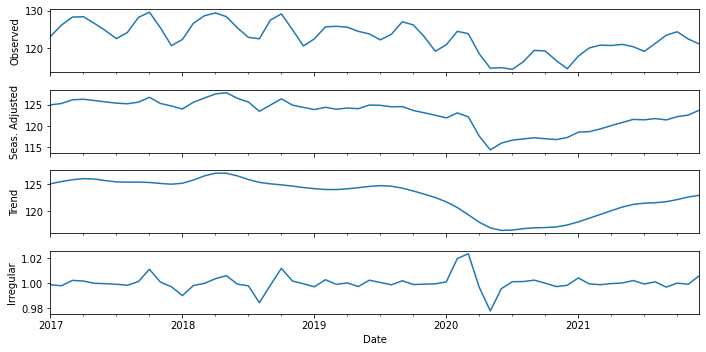

In [10]:
analysis = sm.tsa.x13_arima_analysis(df_02,x12path='./x13as/')
fig = analysis.plot()
fig.set_size_inches(10, 5)
plt.tight_layout()

### Seasonal Adjusted to csv file

In [11]:
analysis.seasadj.to_csv('ApparelCPISA2021.csv')
analysis.seasadj.head()

Date
2017-01-01    124.966380
2017-02-01    125.287882
2017-03-01    126.161263
2017-04-01    126.289253
2017-05-01    125.994933
Name: seasadj, dtype: float64

### Seasonal Factor

In [12]:
seasonalFactor=pd.Series(analysis.observed['ApparelCPI']).div(analysis.seasadj)
seasonalFactor.head()

Date
2017-01-01    0.984969
2017-02-01    1.006482
2017-03-01    1.016556
2017-04-01    1.016310
2017-05-01    1.004509
dtype: float64

<AxesSubplot:xlabel='Date'>

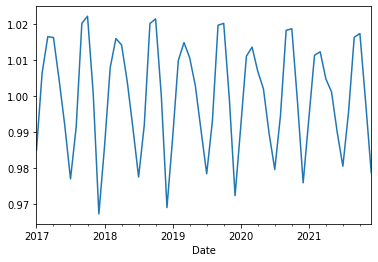

In [13]:
seasonalFactor.plot()